In [1]:
# Marc Garard
# Logistic Regression
# 11/9/2018

import numpy as np

class LogisticRegression:
    A, A_save, A_new, Z, W, b, m = None, None, None, None, None, None, 0
    alpha, dW, db, cost, interations = None, None, None, None, 0
    def __init__(self, A, Y, alpha = 0.01, iterations = 100):
        # check for format and assign class variables
        self.A, self.Y = self.checkInputs( A, Y )
        self.m = (self.A).shape[1]
        # normalize the data and initialize hyperparamters
        self.A_save = self.A
        #self.A = self.meanNormalize( A )
        self.W, self.b = self.initializeParameters( (self.A).shape[0] )
        self.alpha = alpha
        return

    def __del__(self):
        return

    # check for proper input, else default to self
    def checkValuesA( self, A, Y, W, b ):
        if A is None: A = self.A
        if Y is None: Y = self.Y
        if W is None: W = self.W
        if b is None: b = self.b
        return A, Y, W, b

    def checkValuesB( self, A, A_new, Y, W, b, alpha ):
        if A is None: A = self.A
        if A_new is None: A_new = self.A_new
        if Y is None: Y = self.Y
        if W is None: W = self.W
        if b is None: b = self.b
        if alpha is None: alpha = self.alpha
        return A, A_new, Y, W, b

    def initializeParameters(self, dim1, dim2 = 1, seed = 1):
        np.random.seed(seed)
        return (np.random.randn(dim1*dim2)*0.01).astype(np.float64).reshape(dim2, dim1), np.zeros((1, dim2))

    def sigmoid( self, Z ):#
        return 1/(1+np.exp(-Z))

    # activation function
    def activation(self, Z):
        return self.sigmoid(Z)

    # linear function
    def Zf( self, A , W, b ):
        self.Z = np.sum(W.T*A, axis = 0) + b
        return self.Z

    def costf(self, A_new, Y):
        m = A_new.shape[1]
        self.cost = np.sum( -np.multiply( np.log(A_new),Y ) + np.multiply(np.log(1-A_new),(1-Y) ) ) / m
        return self.cost

    def forwardProp(self, A = None, Y = None, W = None, b = None):
        # check for proper input, else default to self
        A, Y, W, b = self.checkValuesA( A, Y, W, b )
        self.A_new = self.activation(self.Zf( A, W, b ))
        self.cost = self.costf( self.A_new, Y )
        return self.cost

    def meanNormalize(self, A = None ):
        if A is None: A = self.A_Save
        return ( A - np.mean( A ) ) / ( np.amax( A ) - np.amin( A ) )

    def backProp(self, W = None, b = None, A_new = None, A = None, Y = None, alpha = None):
        A, A_new, Y, W, b= self.checkValuesB( A, A_new, Y, W, b, alpha )
        m = A_new.shape[1]
        self.dZ = A_new - Y
        self.dW = ( np.sum(A*self.dZ, axis = 1, keepdims = True) / m ).T
        self.db = np.sum(self.dZ, axis = 1, keepdims = True) / m
        self.W, self.b = self.updateParams( W, b, self.dW, self.db )
        return self.dW, self.db

    def updateParams( self, W, b, dW, db ):
        self.W = W - (self.alpha*dW)
        self.b = b - self.alpha*db
        return self.W, self.b

    def train( self, iterations = None ):
        if iterations is None: iterations = 5
        for i in range( iterations ):
            self.forwardProp()
            self.backProp()
        return

    def trainAccuracy( self ):
        sig = self.sigmoid(self.Zf(self.A_save, self.W, self.b))
        ls = np.array([1 if i >= 0.5 else 0 for i in sig[0] ])
        return np.sum(ls==self.Y)/len(self.Y[0])*100, "%"

    def optimizeAlpha(self, r = [0.001, .005,0.01, 0.1, 1, 2], epochs = 100):
        best, best2, best_alpha = 10000, 10000, None
        i1 = None
        for i, val in enumerate(r):
            if val > 0:
                W = self.W
                b = self.b
                self.alpha = val
                self.train(epochs)
                best2 = self.cost
                if ((self.cost < best) and self.cost > 0):
                    #if best < best2:
                        #best2 = best
                        #i2 = i1
                    best = self.cost
                    i1 = i
                self.A = self.A_save
                self.W = W
                self.b = b
        if i1 is not None: self.alpha = r[i1]
        return

    def predict( self, X ):
        X, Y = self.checkInputs( X )
        sig = self.sigmoid(self.Zf(X, self.W, self.b))
        return np.array([1 if i >= 0.5 else 0 for i in sig[0] ])

    def checkInputs( self, A, Y = [0] ):
        if type(A) != 'numpy.ndarray' and type(Y) != 'numpy.ndarray':
            A = np.array(A)
            Y = np.array(Y).reshape(1, len(Y))
        else:
            A = A
            Y = Y
        return A, Y

    def setValue( self, key, val ):
        if key == 'A': self.A = val
        if key == 'A_new': self.A_new = val
        if key== 'Y': self.Y = val
        if key == 'W': self.W = val
        if key == 'b': self.b = val
            

Optimized Alpha for Normal Distribution =  0.010985411419875584
Optimized Alpha for Exponential Distribution =  0.007543120063354615
A Train Accuracy:  (88.18181818181819, '%')
B Train Accuracy:  (97.27272727272728, '%')


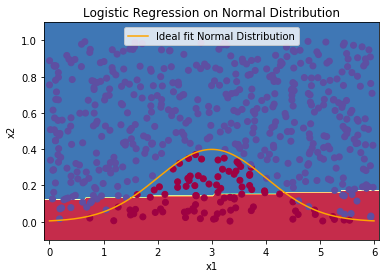

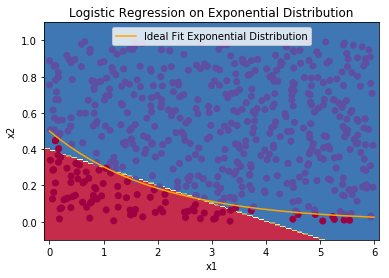

In [3]:
# Marc Garard
# 12/16/18 updated to sample against Normal distribution and exponetial distribution to test the logistic regression
# and to include contour maps of the training result and to use the optimizeAlpha function

import matplotlib.pyplot as plt
import math
import scipy.stats

#create data set: X1
x_range, y_range = 6, 1
X1 = np.random.rand(2,550)
X1[0] *= x_range
X1[1] *= y_range

#create data set: Y1
mu, sigma = 3, math.sqrt(1)
Y1, Y2 = [0]*len(X1[0]), [0]*len(X1[0])
for i in range( len(X1[0]) ):
    if X1[1][i] > scipy.stats.norm.pdf(X1[0][i], mu, sigma): Y1[i] = 1
    if X1[1][i] > scipy.stats.expon.pdf(X1[0][i], 0, 2): Y2[i] = 1

# train the data on two sets: a, b
alpha = 0.110
alpha_range = np.geomspace(0.0001, 1, 50)
a = LogisticRegression(X1, Y1, alpha = alpha)
np.random.seed(5),
a.optimizeAlpha(alpha_range , 100)
print('Optimized Alpha for Normal Distribution = ', a.alpha)
b = LogisticRegression(X1, Y2, alpha = alpha)
b.optimizeAlpha(alpha_range , 100)
print("Optimized Alpha for Exponential Distribution = ", b.alpha)

a.train(100000)
b.train(100000)
print( 'A Train Accuracy: ', a.trainAccuracy() )
print( 'B Train Accuracy: ', b.trainAccuracy() )


# Set min and max values and give it some padding
x_min, x_max = -0.1, x_range + 0.1
y_min, y_max = -0.1, y_range + 0.1
h = 0.01
    
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z1 = a.predict([xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
Z2 = b.predict([xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

# close the objects
del(a)
del(b)

# Plot the contour and training examples
plt.contourf(xx, yy, Z1, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
xl1 = np.linspace(mu - 3*sigma, mu + 3*sigma, 10000)
plt.plot(xl1, scipy.stats.norm.pdf(xl1, mu, sigma), color = 'orange', label = 'Ideal fit Normal Distribution')
plt.scatter(X1[0], X1[1], c=Y1, cmap=plt.cm.Spectral)
plt.title("Logistic Regression on Normal Distribution")
plt.legend(loc=9)
plt.show()

# Plot the contour and training examples
plt.contourf(xx, yy, Z2, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
xl2 = np.linspace(0, 6, 10000)
plt.plot(xl2, scipy.stats.expon.pdf(xl2, 0, 2), c='orange', label = 'Ideal Fit Exponential Distribution')
plt.scatter(X1[0], X1[1], c=Y2, cmap=plt.cm.Spectral)
plt.title("Logistic Regression on Exponential Distribution")
plt.legend(loc=9)
plt.show()

